In [149]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\MenaceXnadin\.cache\kagglehub\datasets\rakeshkapilavai\extrovert-vs-introvert-behavior-data\versions\1


In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv('personality_dataset.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# Exploratory Data Preprocessing

In [217]:
df.shape

(2900, 8)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [219]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2895     True
2896    False
2897    False
2898    False
2899    False
Length: 2900, dtype: bool

In [220]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [221]:
df.duplicated().sum()

np.int64(388)

In [222]:
df_ext = df[df['Personality']=='Extrovert']
df_ext

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
...,...,...,...,...,...,...,...,...
2887,0.0,No,9.0,6.0,No,6.0,3.0,Extrovert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert


In [223]:
df_inv = df[df['Personality']=="Introvert"]
df_inv

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
11,10.0,Yes,3.0,1.0,Yes,4.0,0.0,Introvert
14,6.0,Yes,3.0,0.0,Yes,1.0,3.0,Introvert
...,...,...,...,...,...,...,...,...
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert


In [224]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [225]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

# Visualizing Missing Values

<Axes: >

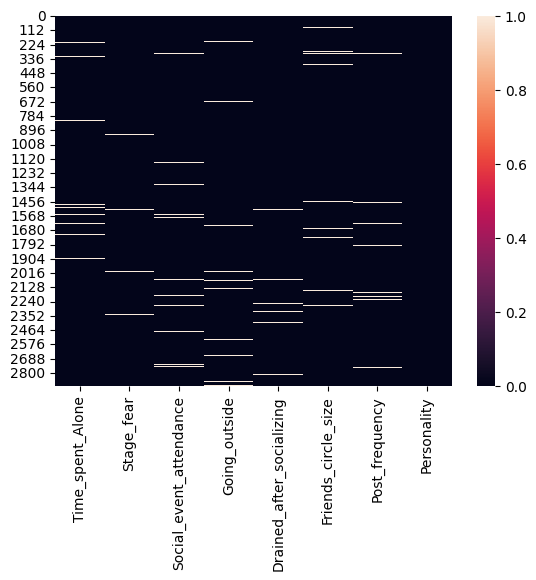

In [226]:

sns.heatmap(df.isnull(),cbar=True)

<Axes: >

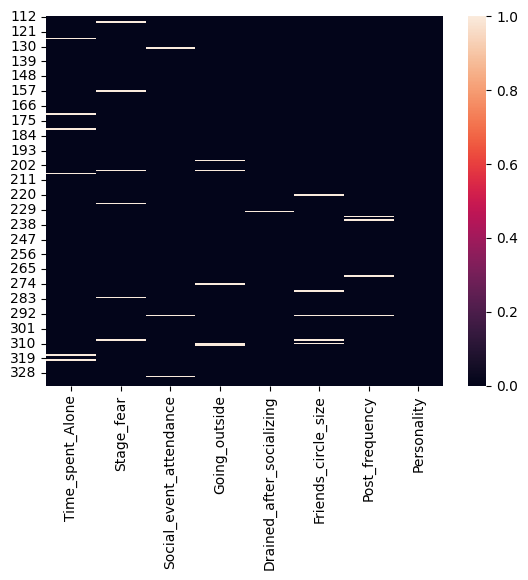

In [227]:
zoomed_df = df[112:336]
sns.heatmap(zoomed_df.isnull(),cbar=True)

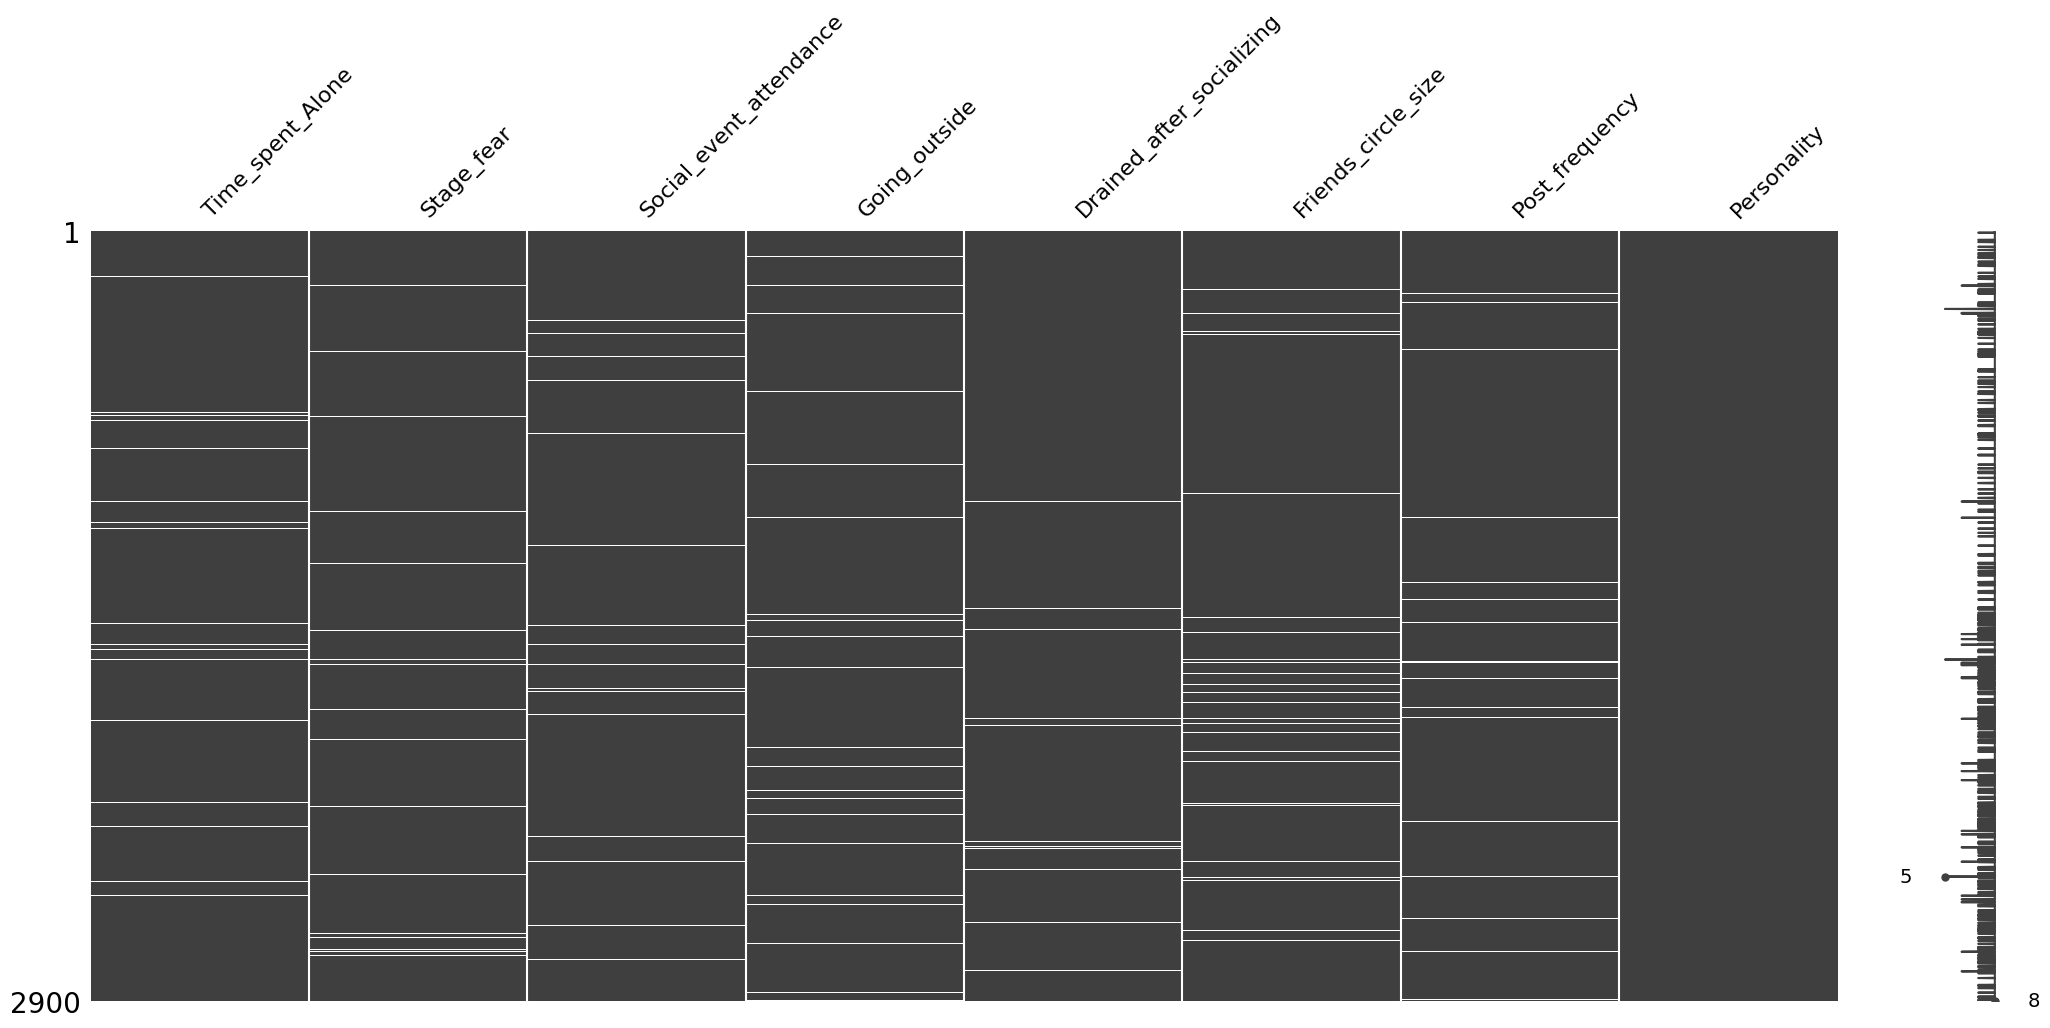

In [228]:
import missingno as msno
msno.matrix(df)
plt.show()

<Axes: xlabel='Personality'>

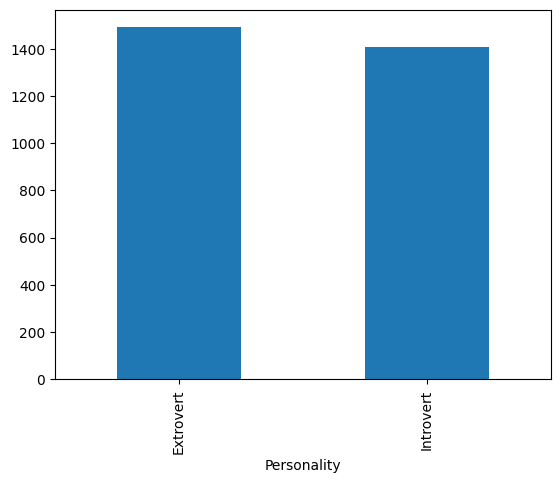

In [229]:
#univariate analysis
df['Personality'].value_counts().plot(kind='bar')

In [230]:
df.columns

Index(['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [231]:
df['Time_spent_Alone']

0        4.0
1        9.0
2        9.0
3        0.0
4        3.0
        ... 
2895     3.0
2896     3.0
2897     4.0
2898    11.0
2899     3.0
Name: Time_spent_Alone, Length: 2900, dtype: float64

In [232]:
(df['Time_spent_Alone']==4).sum()

np.int64(190)

<Axes: xlabel='Time_spent_Alone', ylabel='Count'>

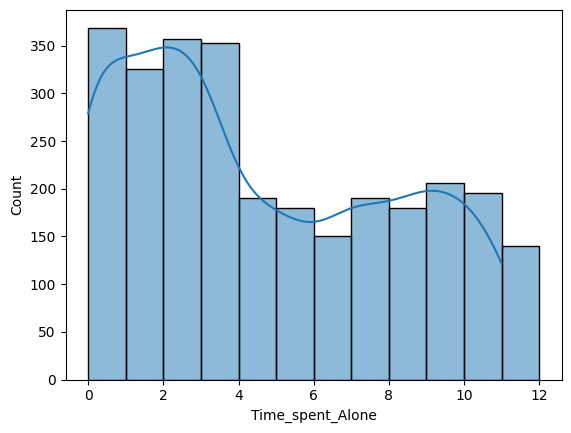

In [233]:
sns.histplot(df['Time_spent_Alone'].dropna(),kde=True,bins=range(0,13))

<Axes: title={'center': 'extrovert'}, ylabel='Time_spent_Alone'>

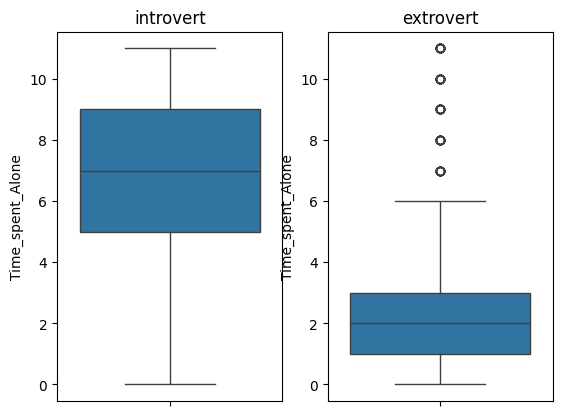

In [234]:
plt.Figure(figsize=(12,12))
fig,ax=plt.subplots(1,2)
ax[0].set_title("introvert")
sns.boxplot(df_inv['Time_spent_Alone'],ax=ax[0])
ax[1].set_title("extrovert")
sns.boxplot(df_ext['Time_spent_Alone'],ax=ax[1])

In [235]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [236]:
df.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

In [237]:
numerical_features= ['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
categorical_features =['Stage_fear','Drained_after_socializing']
target = 'Personality'

In [238]:
for col in categorical_features:
    print(df[col].value_counts())

Stage_fear
No     1417
Yes    1410
Name: count, dtype: int64
Drained_after_socializing
No     1441
Yes    1407
Name: count, dtype: int64


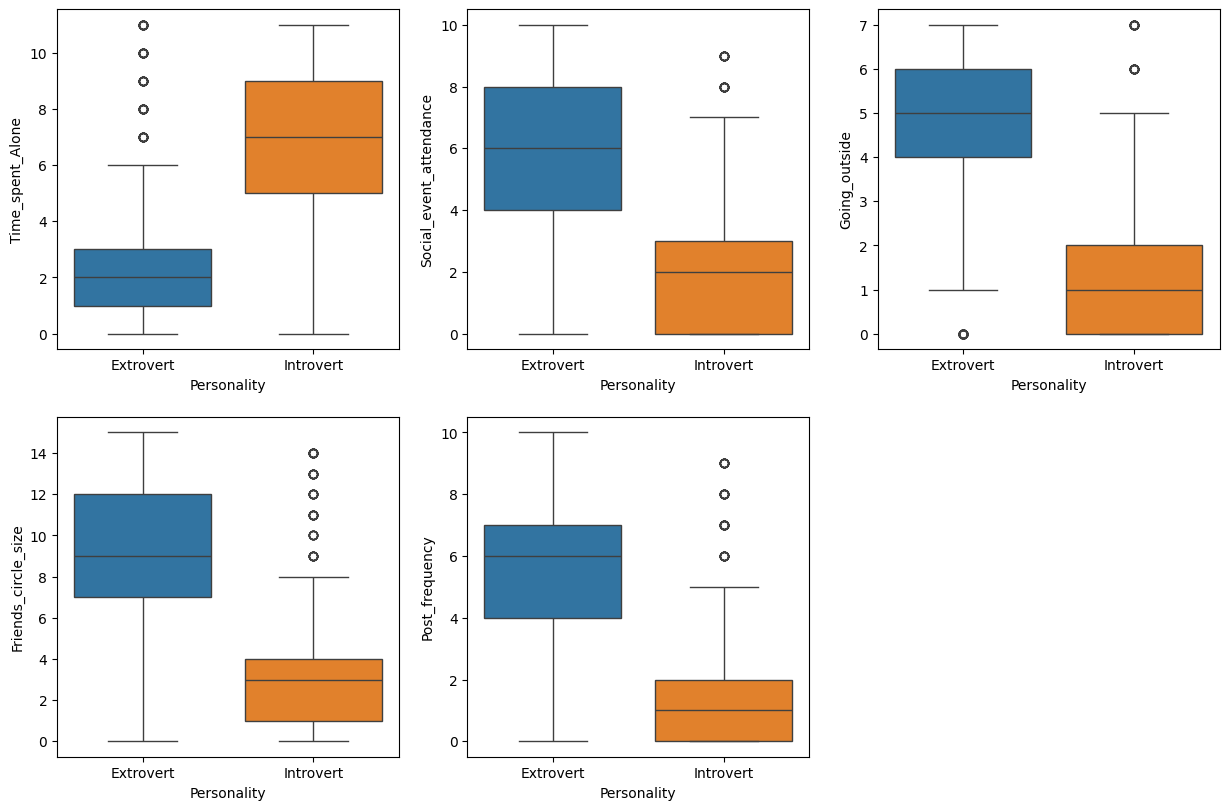

In [239]:
plt.figure(figsize=(15,15))
for i ,col in enumerate(numerical_features,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=target,y=col,hue=target,data=df)
    

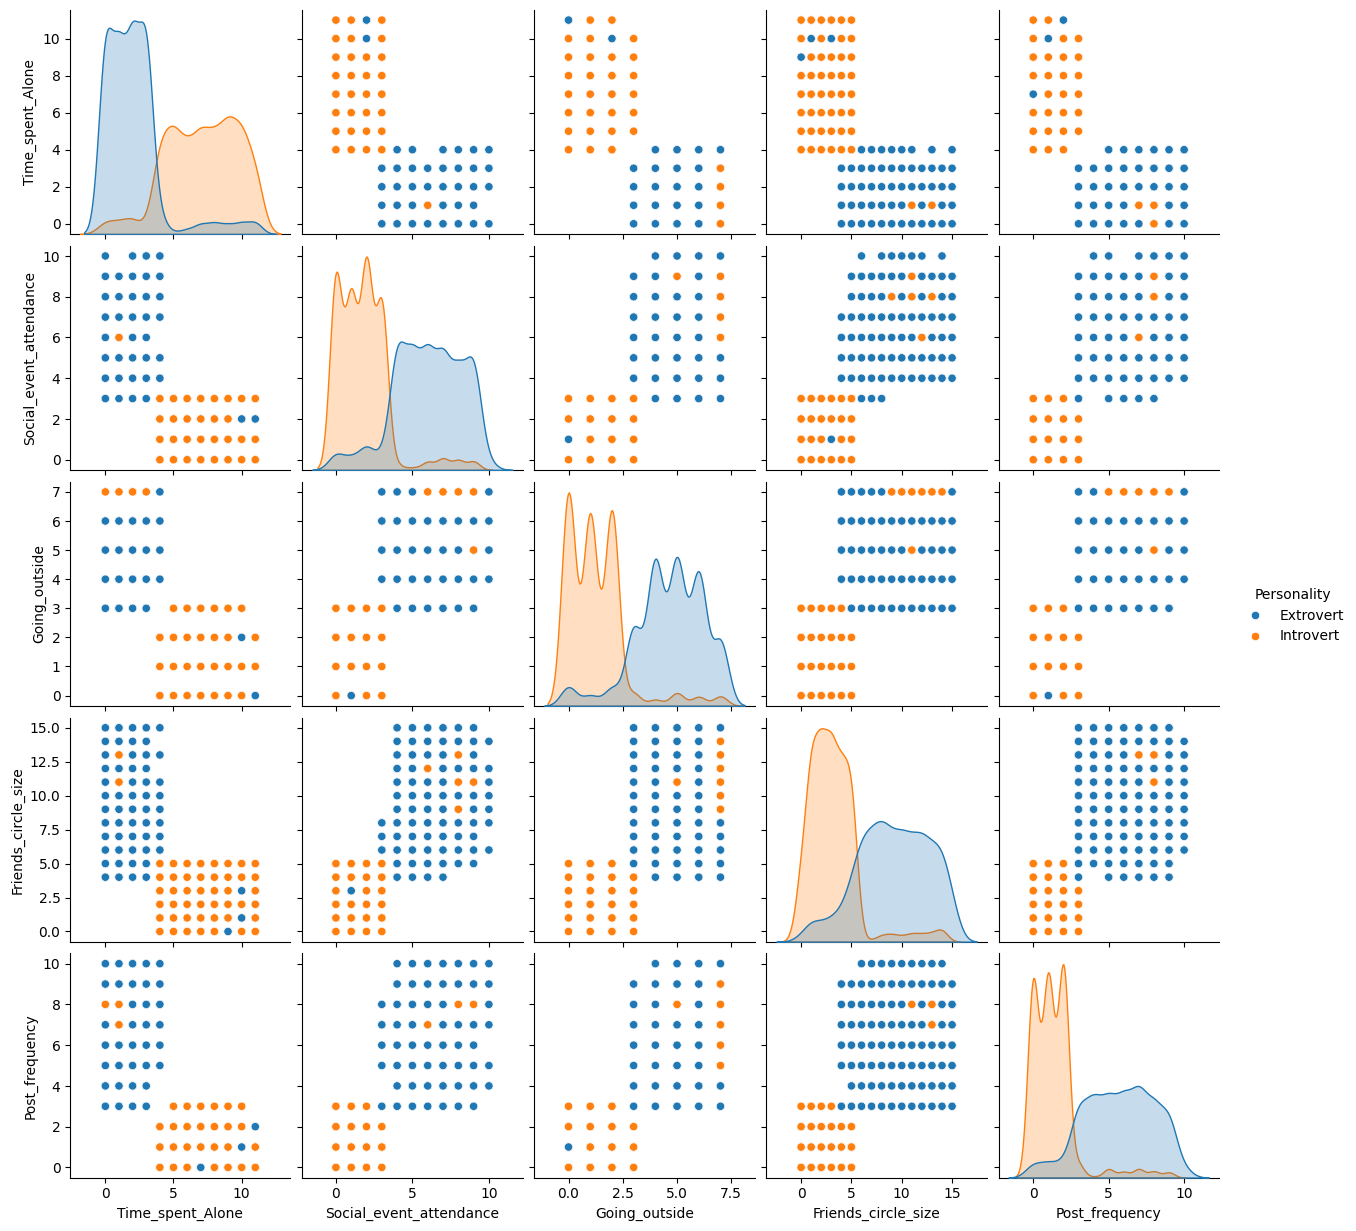

In [240]:
sns.pairplot(df[numerical_features+[target]],hue=target,diag_kind='kde')

<Axes: >

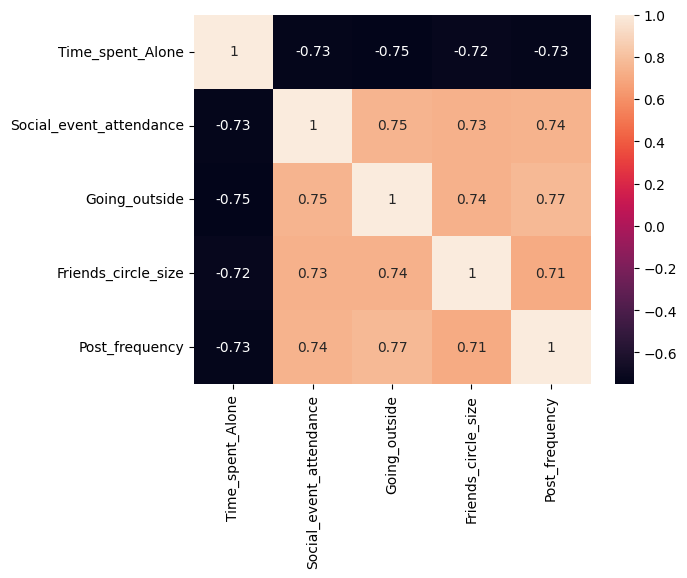

In [241]:
sns.heatmap(df[numerical_features].corr(),annot=True)

# Data PreProcessing



In [242]:
from sklearn.preprocessing import LabelEncoder

In [243]:
df.drop_duplicates(inplace=True)

In [244]:
df.duplicated().sum()

np.int64(0)

In [245]:
bar_data = df.isnull().sum()
bar_data

Time_spent_Alone             61
Stage_fear                   73
Social_event_attendance      61
Going_outside                65
Drained_after_socializing    51
Friends_circle_size          75
Post_frequency               63
Personality                   0
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Time_spent_Alone'),
  Text(1, 0, 'Stage_fear'),
  Text(2, 0, 'Social_event_attendance'),
  Text(3, 0, 'Going_outside'),
  Text(4, 0, 'Drained_after_socializing'),
  Text(5, 0, 'Friends_circle_size'),
  Text(6, 0, 'Post_frequency'),
  Text(7, 0, 'Personality')])

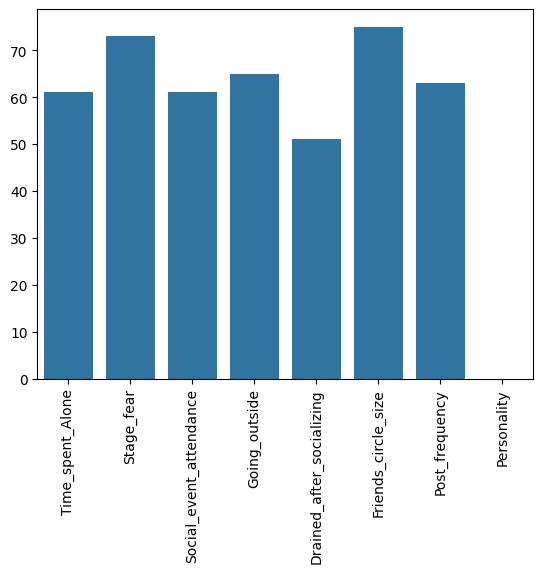

In [246]:
sns.barplot(bar_data)
plt.xticks(rotation=90)

In [247]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[target]=le.fit_transform(df[target])#transforming into numerical values
print(f'Encoded class : {le.classes_} {le.transform(le.classes_)}')


Encoded class : ['Extrovert' 'Introvert'] [0 1]


In [248]:
print(categorical_features)

['Stage_fear', 'Drained_after_socializing']


In [249]:
print(numerical_features)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']


In [250]:
df[categorical_features]

,Stage_fear,Drained_after_socializing
0,No,No
1,Yes,Yes
2,Yes,Yes
3,No,No
4,No,No
...,...,...
2894,No,No
2896,No,No
2897,Yes,Yes
2898,Yes,Yes


In [259]:
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,0
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,1
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,1
3,0.0,No,6.0,7.0,No,14.0,8.0,0
4,3.0,No,9.0,4.0,No,8.0,5.0,0
...,...,...,...,...,...,...,...,...
2894,0.0,No,9.0,3.0,No,12.0,NaN,0
2896,3.0,No,8.0,3.0,No,14.0,9.0,0
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,1
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,1


In [261]:
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer


#imputing numeric features
num_imputer = SimpleImputer(strategy='median')
df[numerical_features]=num_imputer.fit_transform(df[numerical_features])
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_features]=cat_imputer.fit_transform(df[categorical_features])

# preprocessor = make_column_transformer(
#     (num_imputer,numerical_features),
#     (cat_imputer,categorical_features)
# )
# imputed = preprocessor.fit_transform(df)

In [ ]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


KeyError: "None of [Index(['Stage_fear', 'Drained_after_socializing'], dtype='object')] are in the [columns]"

In [265]:
df

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,0,False,False
1,9.0,0.0,0.0,0.0,3.0,1,True,True
2,9.0,1.0,2.0,5.0,2.0,1,True,True
3,0.0,6.0,7.0,14.0,8.0,0,False,False
4,3.0,9.0,4.0,8.0,5.0,0,False,False
...,...,...,...,...,...,...,...,...
2894,0.0,9.0,3.0,12.0,3.0,0,False,False
2896,3.0,8.0,3.0,14.0,9.0,0,False,False
2897,4.0,1.0,1.0,4.0,0.0,1,True,True
2898,11.0,1.0,3.0,2.0,0.0,1,True,True


In [266]:
encoded_columns = [col for col in df.columns if col != target]

In [267]:
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [268]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.00000,2512.000000
mean,4.179936,4.213774,3.198646,6.589172,3.81051,0.435908
std,3.409212,2.873699,2.216649,4.260626,2.91536,0.495974
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,2.000000,1.000000,3.000000,1.00000,0.000000
50%,3.000000,4.000000,3.000000,6.000000,3.00000,0.000000
75%,7.000000,7.000000,5.000000,10.000000,6.00000,1.000000
max,11.000000,10.000000,7.000000,15.000000,10.00000,1.000000


In [270]:
#splitting the data
X = df.drop(columns=[target])
y = df[target]

In [271]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [272]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)


In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
models = {
    'logistic': {
        'model': LogisticRegression(max_iter=1000),
        'use_scaled': True,
        'params': {'C': np.logspace(-4, 4, 20), 'solver': ['lbfgs', 'liblinear']}
    },
    'svm': {
        'model': SVC(probability=True),
        'use_scaled': True,
        'params': {'C': np.logspace(-3, 3, 20), 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto', 0.1, 1]}
    },
    'rf': {
        'model': RandomForestClassifier(random_state=42),
        'use_scaled': False,
        'params': {'n_estimators': [100, 150], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
    },
    'gb': {
        'model': GradientBoostingClassifier(random_state=42),
        'use_scaled': False,
        'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'use_scaled': True,
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    'dt': {
        'model': DecisionTreeClassifier(random_state=42),
        'use_scaled': False,
        'params': {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}
    },
    'xgb': {
        'model': XGBClassifier(random_state=42, eval_metric='logloss'),
        'use_scaled': False,
        'params': {'n_estimators': [100, 150], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'subsample': [0.8]}
    }
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
results = []
for model_name, mp in models.items():
    clf = RandomizedSearchCV(mp['model'], mp['params'], n_iter=20, cv=3, scoring='f1_weighted', n_jobs=-1, random_state=42)
    x_train_current = x_train_scaled if mp['use_scaled'] else x_train
    clf.fit(x_train_current, y_train)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df_results = pd.DataFrame(results)
print("\nModel Performance (Cross-Validation F1-Weighted Scores):")
print(df_results)